Привет, Алина!

Меня зовут Вячеслав Погорелый, и я буду проводить ревью твоего проекта. 

Предлагаю перейти на "ты", если не против)

Но если это не удобно - дай знать, и мы перейдем на "вы". Моя главная задача — не находить сделанные тобою ошибки, а передать свой опыт и помочь тебе стать аналитиком данных.

Я отметил комментарии и замечания разным цветом далее по тексту markdown:

---    
<div class="alert alert-block alert-danger">
    
### Ошибка
    
Критическое замечание, которые следует исправить.
</div> 
    
---
    
<div class="alert alert-block alert-warning">
    
### Совет
    
Замечание\совет на будущее.
</div>
    
---
    
<div class="alert alert-block alert-success">
    
### Успех

Все здорово

Вячеслав, привет! На "ты" - отлично)


Благодарю за правки и комментарии. Постралась учесть.
Это проект, как для новичка, мне показался сложноватым)


Не знаю насколько верно оформила свои комментарии, но с цветным оформлением ячейки гораздо симпатичнее)

# Исследование объявлений о продаже квартир

**Данные для исследования** — это архив объявлений сервиса Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

**Цель исследования** — установить параметры, которые больше всего влияют на общую (полную) стоимость объекта. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Ход исследования** — выполним предобработку данных и изучим их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Хвалю за вступление в проект. Есть подробное описание и информация о данных.
</div 

<div class="alert alert-block alert-info">
 
**Комментарий студента**

Спасибо!

</div 
>

## Общая информация о данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
try:
    data = pd.read_csv('f:/Users/user/Desktop/Learn/project_3/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

Ознакомимся с общей информацией о полученном датафрейме

In [2]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Первичная информция о данных получена

**В датафрейме 23699 строк и 22 столбца. Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.**

**Обратимся к статистическим характеристикам числовых данных.**

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


**Несколько значений необходимо будет проверить на этапе предобработки.** 

В столбце `last_price` минимальное значение 12190.0, для стоимости объекта недвижимости слишком низкое значение. А максимальное значение в этом же столбце больше 763 млн.

В столбце `rooms` минимальное значение 0. Возможно при заполнении данных об объекте было введено неверное значение, а возможно имелось в виду, что квартиру - студия, поэтому комнат 0.

В столбце `ceiling_height` минимально значение высоты потолка 1 м, а максимальной 100 м. Обе величины аномальны для такого показателя.

В столбце `living_area` минимально значение 2. Явная ошибка.

В столбце `kitchen_area` минимальная площадь кухни крайне низкая - 1.3, возможно, это особенности объекта, либо квартира-студия.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Описательные статистики получена

**Построим гистограммы для числовых значений**

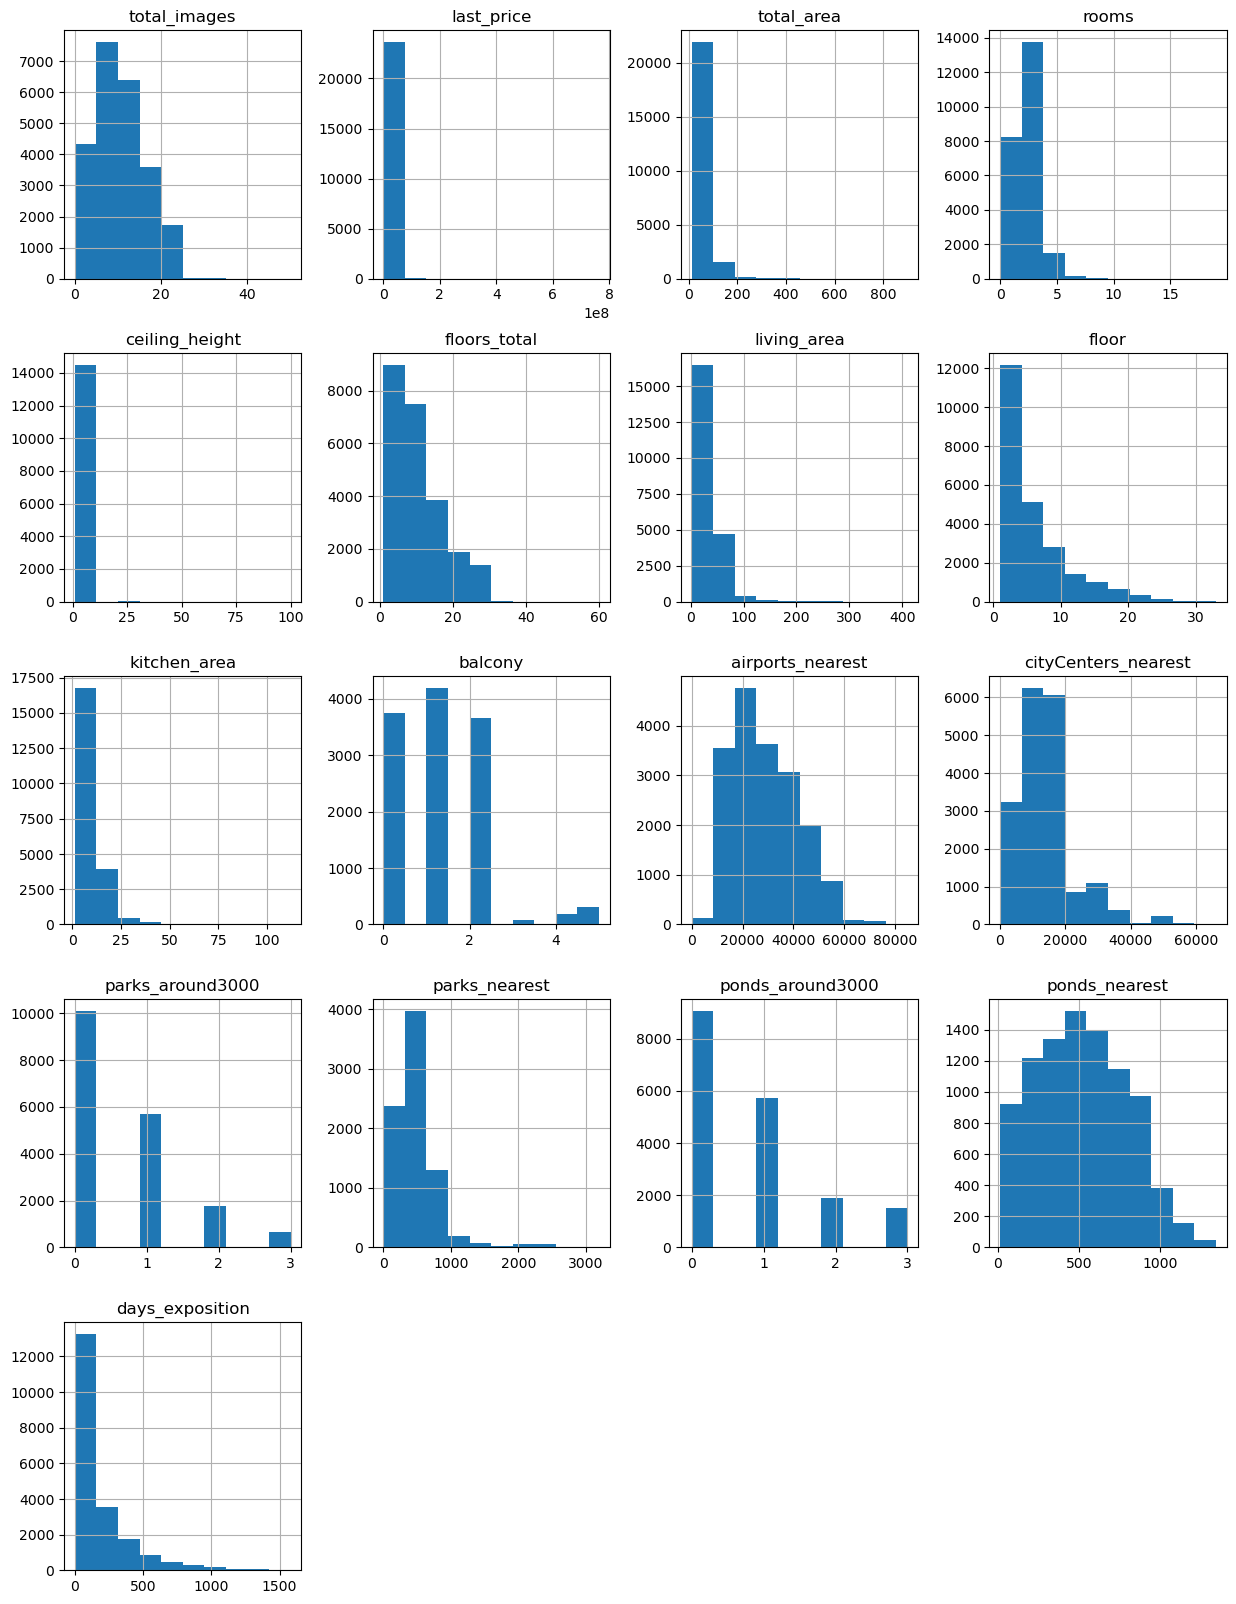

In [5]:
data.hist(figsize=(15, 20))
plt.show()

На гистограмме `days_exposition` обращает на себя внимание большое значение (больше 1400 дней). Проверить данные столбца на этапе предобработки.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
С данными ознакомились первично и получили информацию о них. 

## Предобработка данных

**Прежде чем приступать к исследованию данных, проведем их предобработку.**

Ознакомление с общими данными показало, что:
- необходимо переименовать несколько столбцов;
- в даных есть пропущенные значения;
- тип данных в некоторых столбцах нужно изменить;
- необходимо проверить уникальные значения и аномальные данные.

In [6]:
#переименуем три столбца: приведем к прописным буквам и змеиному регистру
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest', 'parks_around3000':'parks_around_3000', 'ponds_around3000':'ponds_around_3000'})

In [7]:
#проверим названия столбцов после переименования
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [8]:
#найдем все пропущенные значения в датасете
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Визуализируем пропуски с помощью библиотеки missingno**

In [9]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


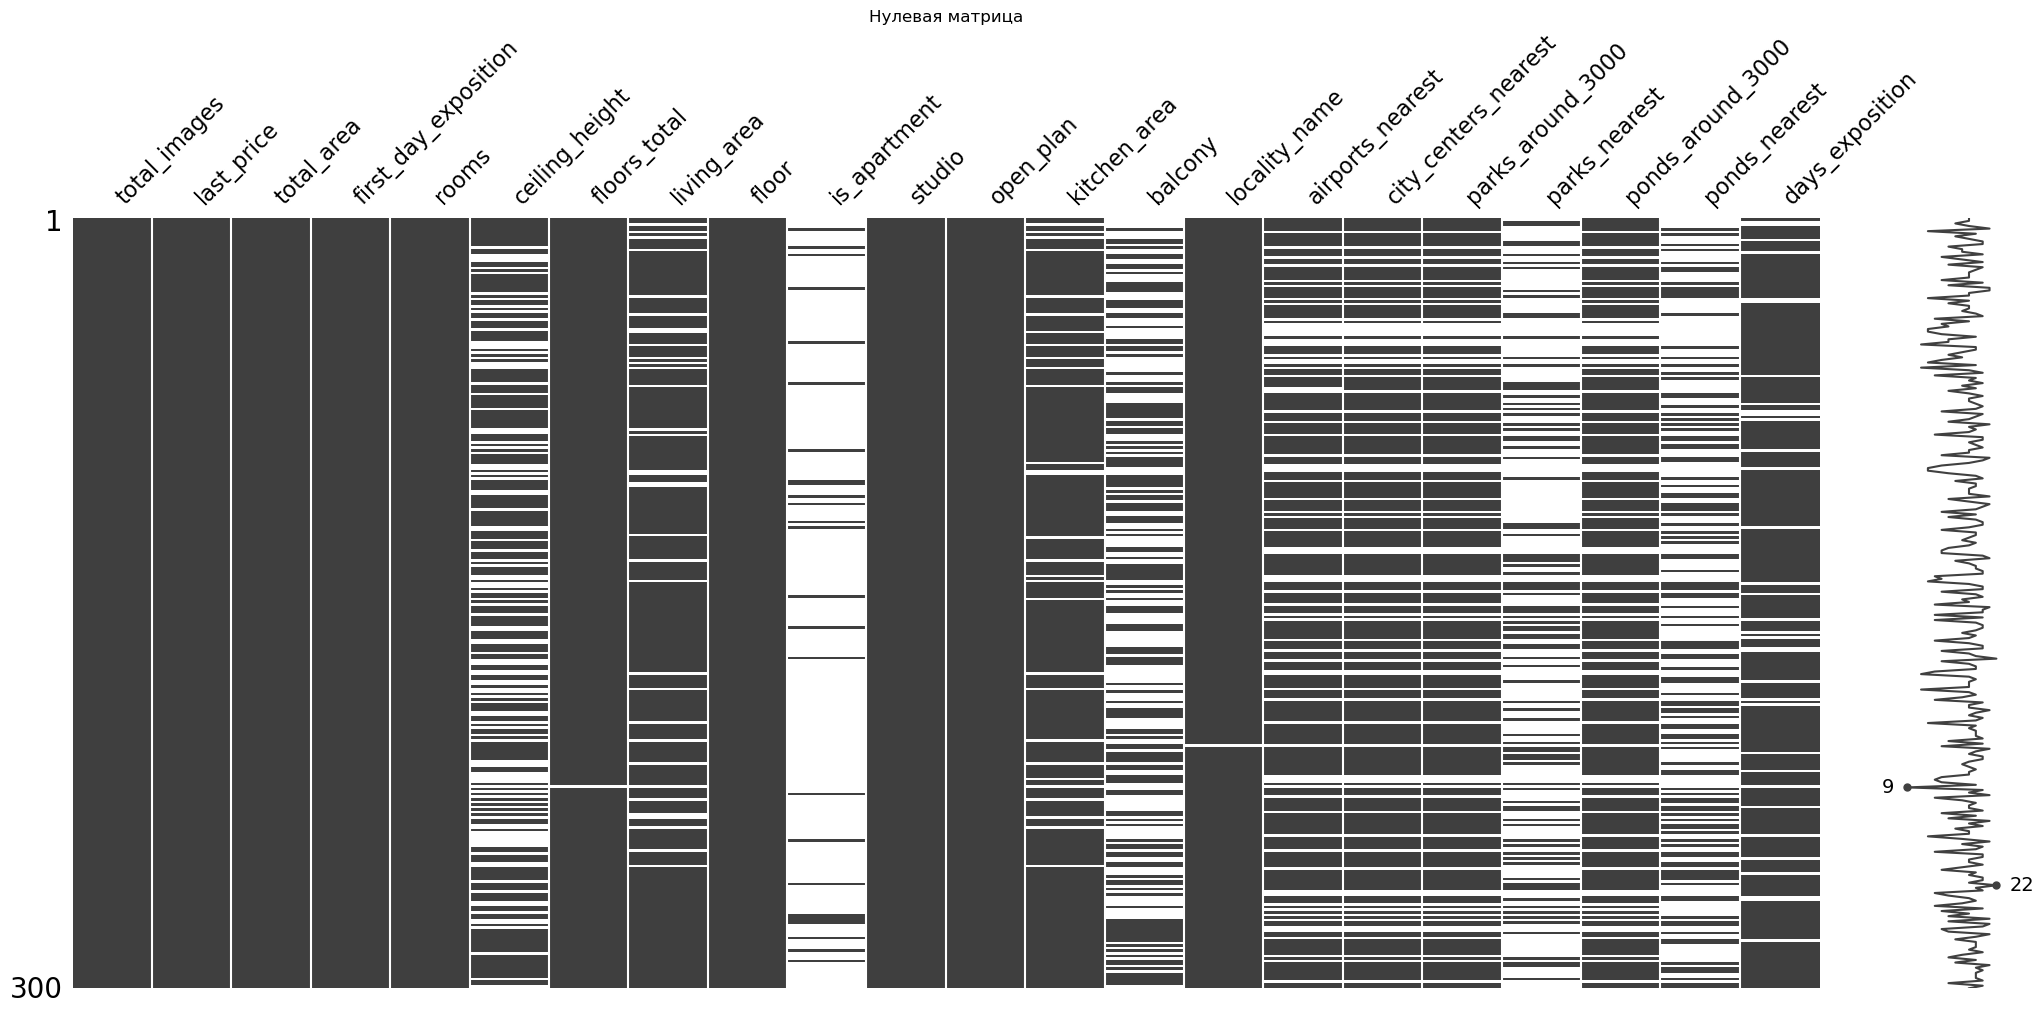

In [10]:
import missingno as msno
%matplotlib inline
msno.matrix(data.sample(300))
plt.title('Нулевая матрица')
plt.show()

**На графике отчетливо видно в каких столбцах больше всего пропусков (например, в `parks_nearest` и  `ponds_nearest`).**

Так же отмечены строки в датасете с наибольшими и наименьшими нулевыми значениями, строка 19 и 28 соответственно.

**Построим еще одну визуализацию, отображающую нулевые значения по столбцам.**

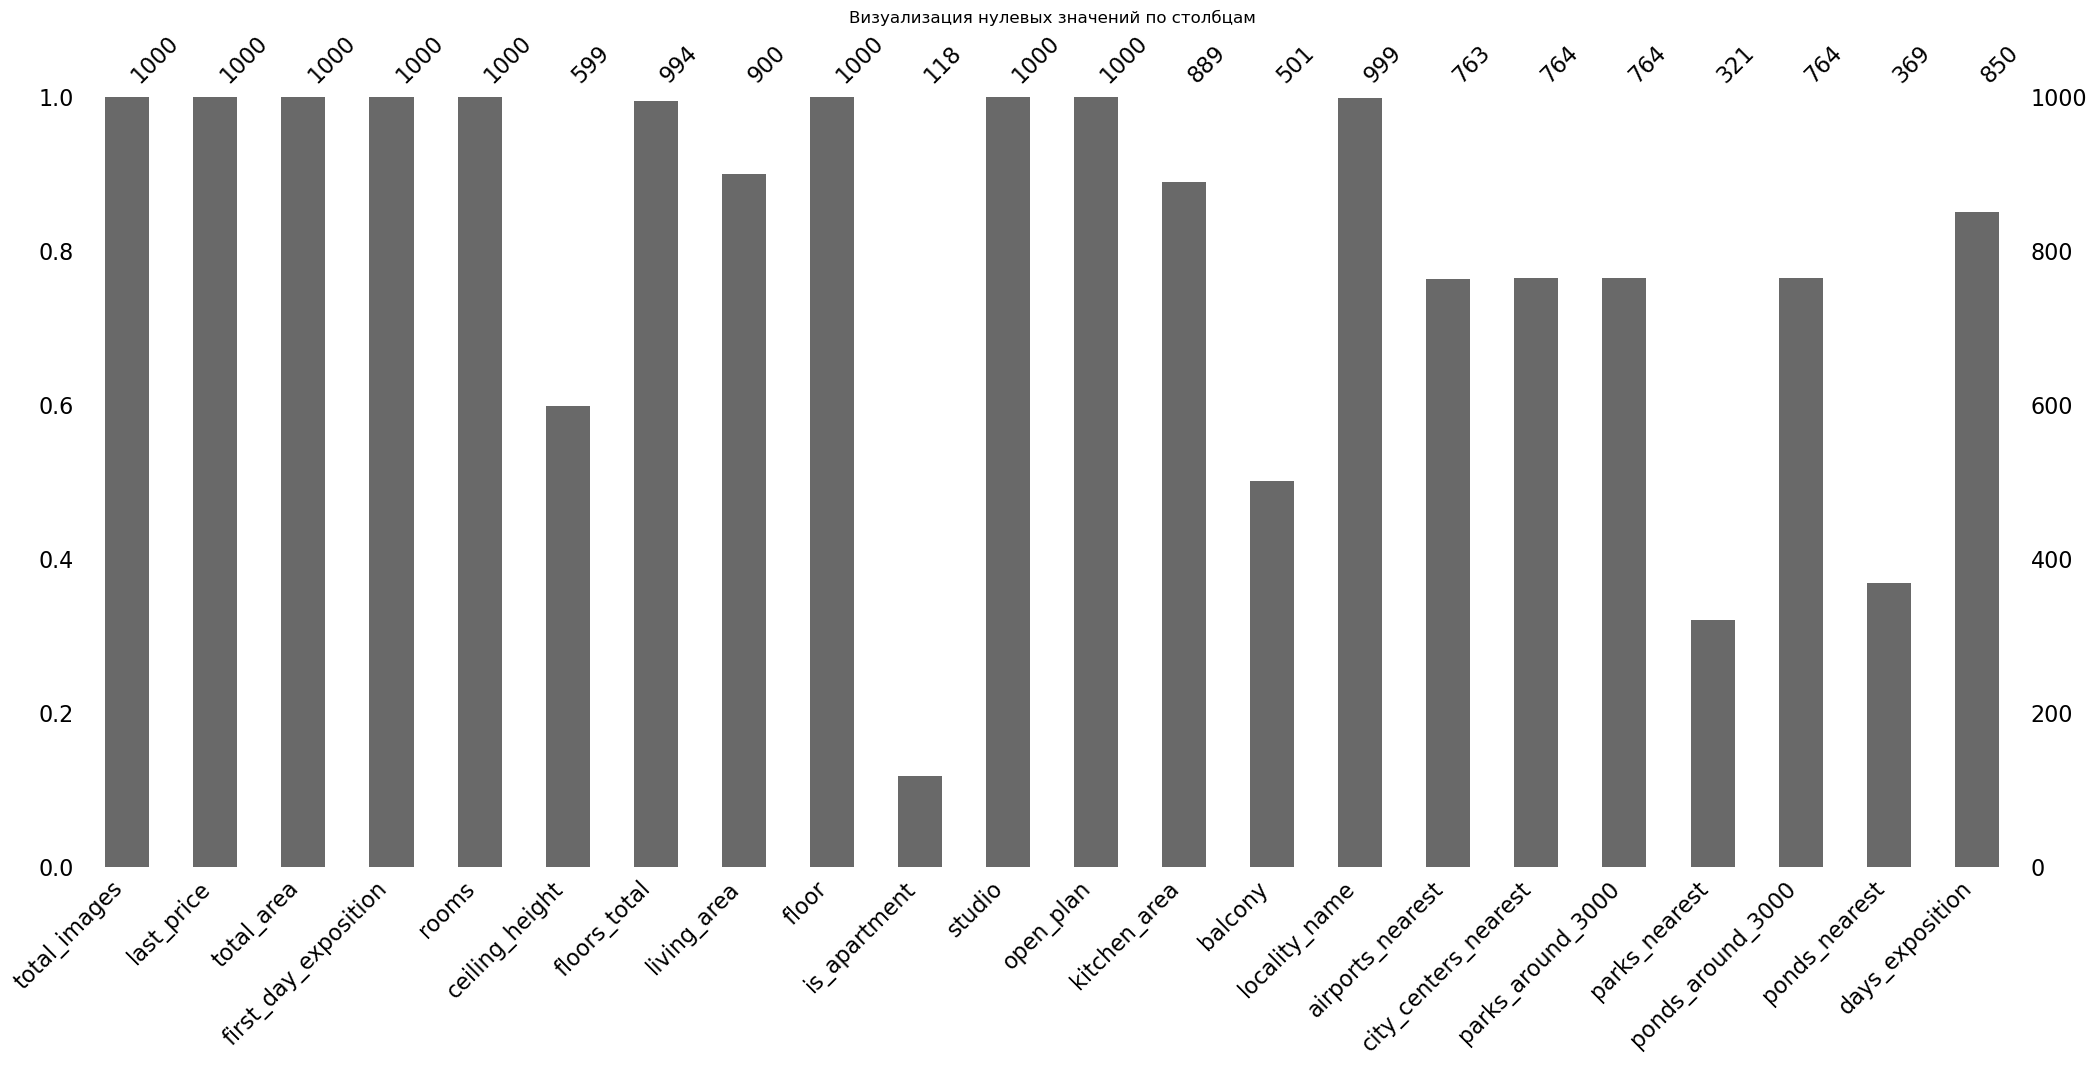

In [11]:
msno.bar(data.sample(1000))
plt.title ('Визуализация нулевых значений по столбцам')
plt.show()

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Для визуализации пропусков используй https://under-sky-ai.ru/post/instrument_vizualizatsii_otsutstvuyuschih_znacheniy_dannyih-missingno

<div class="alert alert-block alert-info">
 
**Комментарий студента**

Спасибо за совет! Интересные вещи.

</div 
>

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Используй на будущее 

**В 14 столбцах есть пропущенные данные:**

**В столбце c высотой потолков `ceiling_height` 9195 пропусков.** Попробуем заменить их на медианное значение.

 **В столбце c общим количеством этажей в доме `floors_total` 86 пропусков.** Их не так много от общего количества, оставим пропуски.

 **В столбце с жилой площадью `living_area` 1903 пропуска.** Их не так много, поэтому оставим их, чтобы не лишаться другой важной информации. 


**В столбце с информацией об аппартаментах `is_apartment` 20924 пропуска.** Поскольку данные имеют булевое значение(либо да, либо нет), то можно предположить,что пропуски - это не аппартаменты. Поэтому заменим пропуски в этом столбце на False.


**В столбце с площадью кухни `kitchen_area` 2278 пропусков.** Оставим эти пропуски.


**В столбце с информацией о наличии `balcony` 11519 пропусков.** Вероятно, что если бы балкон был, то его указали бы, поэтому предположим, что пропуски - это отстуствие балкона, поэтому заменим их на 0.


**В столбце `locality_name` 49 пропусков.** Пропущенных значений не так много и заполнить данные населенными пунктами нет возможности, заполним пропуски "other'.


**В столбце с данными о расстоянии до ближайшего аэропорта `airports_nearest` 5542 пропуска.** Поскольку в целях исследования эти данные неключевые, оставим пропуски.


**В столбце с данными о расстоянии до центра города `city_centers_nearest` 5519 пропусков.** Оставим пропуски.


**В столбце с числом парков в радиусе 3 км `parks_around_3000` 5518 пропусков.** Поскольку в целях исследования эти данные неключевые, оставим пропуски.


**В столбце с данными о расстоянии до ближайшего парка `parks_nearest` 15620 пропусков.** Вероятно, это картографическая ошибка, и, возможно, в небольших населенных пунктах парков нет, но в данных не отмечено. Поскольку в целях исследования эти данные неключевые, оставим пропуски.


**В столбце с числом водоёмов в радиусе 3 км `ponds_around_3000` 5518 пропусков.** Поскольку в целях исследования эти данные неключевые, оставим пропуски. 

**В столбце с данными о расстоянии до ближайшего водоёма `ponds_nearest` 14589 пропусков.** Поскольку в целях исследования эти данные неключевые, оставим пропуски.

**В столбце с количеством дней размещеня объявления `days_exposition` 3181 пропуск.** Возможно, объекты еще не проданы. Оставим эти пропуски.osition          3181

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Очень подробный разбор вышел в данном случае

Проверим наличие явных дубликатов в данных

In [12]:
data.duplicated().sum()

0

In [13]:
#data['last_price'].astype(int)

In [14]:
#выведем все уникальные значения в столбце 'ceiling_height'
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [15]:
#обнаружились значения в 20, 100 м и т.д. По всей вероятности разделительная точка стоит не на своем месте. Выведем только значения больше 20 м.
data.loc[data['ceiling_height']>=20]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,NaN,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.0,5.0,31.3,5,NaN,...,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,NaN,...,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


In [16]:
#разделим все значения больше 20 в столбце 'ceiling_height' на 10
data.loc[data['ceiling_height']>=20, 'ceiling_height'] = data.loc[data['ceiling_height']>=20, 'ceiling_height'] / 10

In [17]:
#проверим результат
data.loc[data['ceiling_height']>=20]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Убрали лишнее. Здорово.

In [18]:
#изучим показатели столбца ceiling_height, медиана и среднее значение не сильно отличаются, и вообще высота потолка достаточно типичное значение, поэтому заменим пропуски в столбце на медианное значение
data['ceiling_height'].describe()

count    14504.000000
mean         2.729608
std          0.319850
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

In [19]:
#заменим пропущенные значения в высоте потолка на медианное 
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Согласен. Сама высота потолков достаточно стандартизированное значение и лучше всего подставить медиану. 

In [20]:
#проверим результат: в столбце нет пропусков
data['ceiling_height'].isna().sum()

0

Так же в столбце `ceiling_height` были обнаружены крайне малые значения, по всей видимости, в них закралась аналогичная большим значениям. Проверим

In [21]:
data['ceiling_height'].sort_values(ascending=True).head(20)

22590    1.00
5712     1.20
16934    1.75
20520    2.00
552      2.00
2572     2.00
11352    2.00
19329    2.00
16884    2.00
22960    2.00
19098    2.00
4212     2.00
17496    2.00
16446    2.00
5850     2.00
12755    2.20
17794    2.25
20507    2.26
23498    2.30
1582     2.30
Name: ceiling_height, dtype: float64

Заменим пропущенные значения в столбце `is_apartment` с информацией об апартаментах на False и изменим тип данных в столбце с информацией об апартаментах на bool

In [22]:
data['is_apartment'] = data['is_apartment'].astype(bool).fillna(False)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Превосходно 

In [23]:

data['is_apartment'] = data['is_apartment']

In [24]:
#проверим результат: в столбце нет пропусков
data['is_apartment'].isna().sum()

0

Заменим пропуске в столбце `balcony` с информацией о наличии балконов на 0 и изменим типа данных на int

In [25]:
data['balcony'] = data['balcony'].fillna(0).astype(int)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Раз балконы не указали, то их могл ои не быть

In [26]:
data['balcony'].isna().sum()

0

В столбце `locality_name` приведем все названия населенных пунктов к единому виду: уберем вид пункта (поселок, деревня и т.д.) и оставим только названия.

In [27]:
name_to_remove = ['поселок ','при железнодорожной станции ', 'платформа ', 'городского типа ', 'поселок городского типа ', 'садоводческое некоммерческое товарищество ', 'деревня ', 'городской поселок ','городской ', 'посёлок ', 'коттеджный ', 'городской посёлок ', 'станции', 'посёлок станции ', 'село ', 'садовое товарищество', ]
for name in name_to_remove:
    data['locality_name'] = data['locality_name'].str.replace(name, '')

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Отличный автоматический метод устранения неявных дублей 

In [28]:
#поскольку восстановить значения пропущенных населенных пунктов не получится и их не так много, заменим их на other
data['locality_name'] = data['locality_name'].fillna('noinfo')

In [29]:
#проверим результат: остались только названия населенных пунктов
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', ' Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск'

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
После устранения лишнего не хватает тут подсчета сколько у нас осталось уникальных значений в названиях. 

<div class="alert alert-block alert-info">
 
**Комментарий студента**

Добавила.

</div 
>

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Исправлено

In [30]:
#проверим сколько уникальных значений осталось в названиях населенных пунктов
data['locality_name'].nunique()

311

Перейдем к пропущенным значениям в столбце `floors_total`. Выведем на экран только те строки, в которых есть пропущенные значения этажности объекта.

In [31]:
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,True,...,12.00,0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,True,...,NaN,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,True,...,10.63,0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,True,...,16.80,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,True,...,NaN,0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.80,NaN,NaN,3,True,...,NaN,0,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.65,NaN,31.70,20,True,...,14.40,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,2.65,NaN,45.38,6,True,...,23.42,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.65,NaN,50.40,18,True,...,23.60,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Пропусков в столбце `floors_total` крайне мало, поэтому удалим их.

In [32]:
data = data.dropna(subset=['floors_total'])

In [33]:
#проверим результат
data['floors_total'].isna().sum()

0

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Пропусков мало и логично от них избавиться

Изменим типа данных в столбце `first_day_exposition` на формат datetime

In [34]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [35]:
#проверим результат
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23613, dtype: datetime64[ns]

In [36]:
#проверим результаты обработки пропусков и изменение типа данных
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name               0
airports_nearest         5532
city_centers_nearest     5509
parks_around_3000        5508
parks_nearest           15568
ponds_around_3000        5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony              

**Выводы:**

  Предобработка обнаружила ряд проблем в данных:
  
- ошибки в названиях трех столбцов;
- пропущенные значения в 14 столбцах;
- аномальные значения в некоторых столбцах.

  В ходе предобработки исправили названия столбцов, там, где было возможным, заменили пропущенные значения, отбросили аномальные значения в некоторых данных.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Хорошая предобработка данных вышла. Осталось пару моментов подправить будет идеально

## Добавление в таблицу новых столбцов

**Добавим в таблицу новые столбцы со следующими параметрами:**

- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (в км, округление до целых значений).

In [38]:
#добавим новый столбец `price_square_meter`. Получим его путем деления стоимости объекта на общую площадь
data['price_square_meter'] = (data['last_price']/data['total_area']).round(2)

In [39]:
#проверим результат
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,True,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00


In [40]:
#добавим новый столбец `weekday_exposition` с днями недели
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Сам люблю подобный метод выделения временных отрезков из даты

In [41]:
#проверим результат
data['weekday_exposition'].unique()

array([3, 1, 4, 0, 2, 6, 5])

In [42]:
#добавим новый столбец `month_exposition` с месяцами публикаций
data['month_exposition'] = data['first_day_exposition'].dt.month

In [43]:
#проверим результат
data['month_exposition'].unique()

array([ 3, 12,  8,  7,  6,  9, 11,  4,  5,  2,  1, 10])

In [44]:
#добавим новый столбец c годом публикации объявления`year_exposition`
data['year_exposition'] = data['first_day_exposition'].dt.year

In [45]:
#проверим результат
data['year_exposition'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014])

**Сгруппируем данные о типах этажа квартиры (значения — «‎первый», «последний», «другой»)**, данные передадим в новый столбец `floors_group`

In [46]:
#создадим функцию, которая проходит по всем значениям столбца `floor` и относит значение к одной из трех категорий
def group_fl(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'нет категории'

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Получилась простая, удобная и понятная функция

In [47]:
#с помощью метода apply() создадим новый столбец с категорией вида этажа
data['floors_group'] = data.apply(group_fl, axis=1)

In [48]:
#проверим результат
data['floors_group'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [49]:
#добавим новый столбец с расстоянием до центра города в км
data['city_center_km'] = (data['city_centers_nearest'] / 1000).round(0)

In [50]:
#проверим результат
data['city_center_km'].unique()

array([16., 19., 14.,  7.,  8., nan, 12., 15., 52., 33., 31., 11., 13.,
       10.,  2., 32.,  4., 17., 30.,  5., 51., 50., 24., 18.,  9., 28.,
        3.,  6., 27., 21., 49., 35., 36., 34.,  1., 29., 26., 53., 22.,
       55., 20., 23., 25.,  0., 66., 47., 40., 57., 37., 41., 43., 48.,
       62., 60., 39., 42., 65., 54., 59., 45., 61., 63.])

*Проверим наличие шести новых столбцов в датафрейме*

In [51]:
data.head().T

,0,1,2,3,4
total_images,20,7,10,0,2
last_price,13000000.0,3350000.0,5196000.0,64900000.0,10000000.0
total_area,108.0,40.4,56.0,159.0,100.0
first_day_exposition,2019-03-07 00:00:00,2018-12-04 00:00:00,2015-08-20 00:00:00,2015-07-24 00:00:00,2018-06-19 00:00:00
rooms,3,1,2,3,2
ceiling_height,2.7,2.65,2.65,2.65,3.03
floors_total,16.0,11.0,5.0,14.0,14.0
living_area,51.0,18.6,34.3,NaN,32.0
floor,8,1,4,9,13
is_apartment,True,True,True,True,True


**Выводы**

Создали 6 новых столбцов с параметрами, которые помогут в дальнейшем исследовании данных:

- посчитали стоимость квадратного метра для каждого объекта;
- выделили в отдельные столбцы день, месяц и год публикации объявления;
- сгруппировали в три группы расположение объекта в зависмости от этажа;
- перевели расстояние до центра города в километры.


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
А теперь данные готовы к дальнейшему анализу

## Исследовательский анализ данных

**Изучим следующие параметры объектов:**


- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

Построим отдельные гистограммы для каждого из этих параметров.

**Изучим параметры столбца `total_area`**

In [52]:
data['total_area'].describe()

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

Построим гистограмму столбца `total_area`

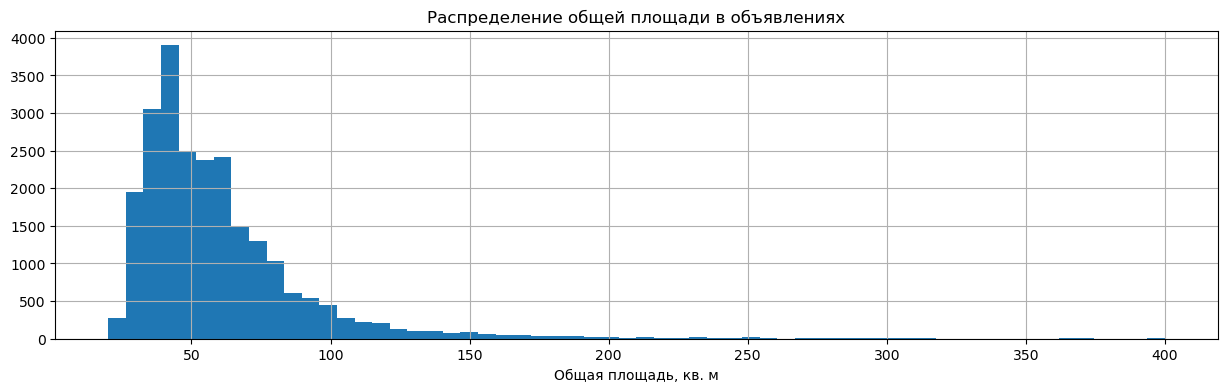

In [53]:
plt.figure(figsize=(15,4))
#использем масштаб от 20 до 400 кв. м
data.total_area.hist(bins=60, range=(20,400))
plt.xlabel('Общая площадь, кв. м')
plt.title('Распределение общей площади в объявлениях')
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Отличный график распределения вышел

**Из графика видно, что основная часть объектов в датасете - это объекты с общей площадью примерно от 30 до 100 кв. м.**

Объекты с площадью свыше 300 кв. м  встречаются крайне редко. Избавимся от крайне малых значений до 20 кв. м и от больших значений свыше 300 кв. м.

In [54]:
#сохраним изменения в новой переменной
data_good_total_area = data.query('20<=total_area<300').copy()

In [55]:
#проверим оставшееся количество строк
data_good_total_area[data_good_total_area['total_area']>300]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month_exposition,year_exposition,floors_group,city_center_km


In [56]:
data_good_total_area['total_area'].describe()

count    23523.000000
mean        59.468460
std         30.417889
min         20.000000
25%         40.000000
50%         52.000000
75%         69.450000
max        297.500000
Name: total_area, dtype: float64

In [57]:
#data_good_total_area.boxplot(column='total_area', figsize=(5, 6))
#plt.ylim(0,400)
#plt.ylabel('Общая площадь, кв. м')
#plt.title('Распределение общей площади в объявлениях')
#plt.show()

**Изучим числовые параметры столбца `living_area`**

In [58]:
data['living_area'].describe()

count    21743.000000
mean        34.462781
std         22.037433
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [59]:
data['living_area'].value_counts().head(10)

living_area
18.0    882
17.0    674
30.0    598
16.0    484
20.0    481
28.0    423
31.0    379
19.0    327
32.0    318
29.0    318
Name: count, dtype: int64

Построим гистограмму столбца `living_area`

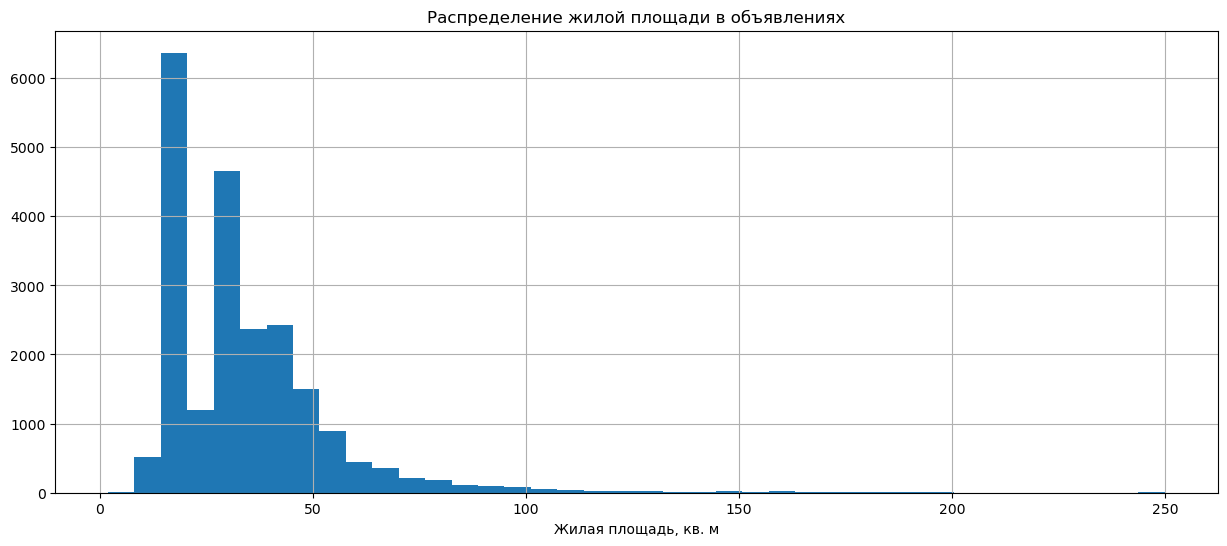

In [60]:
plt.figure(figsize=(15,6))
data.living_area.hist(bins=40, range=(2,250))
plt.xlabel('Жилая площадь, кв. м')
plt.title('Распределение жилой площади в объявлениях')
plt.show()

**Гистограмма показывает, что самое большое количество объектов с жилой площадью около 15-18 кв. м. - по всей веротности это квартиры-студии, которые пользуются популярностью. И вторая группа по количеству объектов - недвижимость с жилой площадью от 30 до 50 кв. м.**

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
По выводу здорово получилось 

Избавимся от значений меньше 10 кв. м и больше 200 кв. м.

In [61]:
#сохраним изменения в новой переменной
data_good_living_area = data.query('10<living_area<200').copy()

In [62]:
data_good_living_area[data_good_living_area['living_area']>200]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month_exposition,year_exposition,floors_group,city_center_km


In [63]:
#проверим оставшееся количество строк
data_good_living_area['living_area'].count()

21654

**Проанализируем данные столбца `kitchen_area`**

In [64]:
data['kitchen_area'].describe()

count    21382.000000
mean        10.564128
std          5.904316
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Построим гистограмму столбца `kitchen_area`

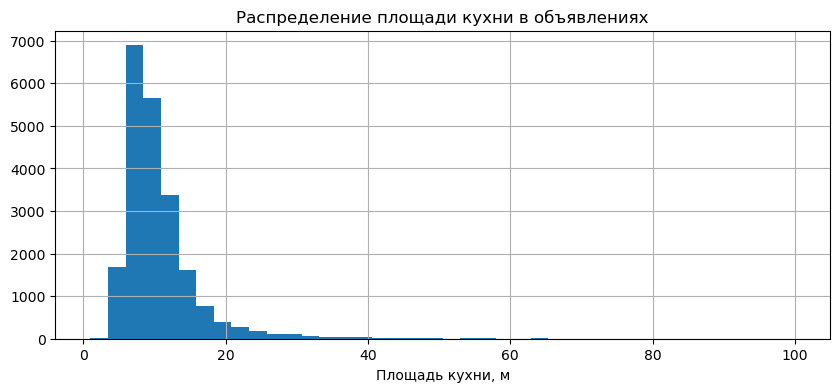

In [65]:
plt.figure(figsize=(10,4))
data.kitchen_area.hist(bins=40,range=(1,100))
plt.xlabel('Площадь кухни, м')
plt.title('Распределение площади кухни в объявлениях')
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
В целом, по распределению кухни достаточно небольшие получились

Судя по гистограмме, наибольшее количество объявлений с площадью кухни от 5 до 18 кв. м.

Кухни с площадью 50 кв. м и больше встречаются крайне редко.

In [66]:
#метод value_counts() подтверждает данные гистограммы
data['kitchen_area'].value_counts().head(15)

kitchen_area
6.0     1300
10.0    1262
8.0     1110
9.0     1100
7.0     1062
11.0     796
12.0     660
8.5      414
5.5      400
14.0     381
5.0      358
15.0     350
13.0     323
6.3      296
6.2      282
Name: count, dtype: int64

Избавимся от значений меньше 5 кв. м и больше 50 кв. м.

In [67]:
#сохраним изменения в новой переменной
data_good_kitchen_area = data.query('kitchen_area>5 and kitchen_area<=50').copy()

In [68]:
data_good_kitchen_area[data_good_kitchen_area['kitchen_area']>50]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month_exposition,year_exposition,floors_group,city_center_km


In [69]:
#проверим оставшееся количество строк
data_good_kitchen_area['kitchen_area'].count()

20874

**Изучим данные в столбце `last_price`**

In [70]:
data['last_price'].describe()

count    2.361300e+04
mean     6.540555e+06
std      1.090172e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Посторим гистограмму по данным стоимости объектов

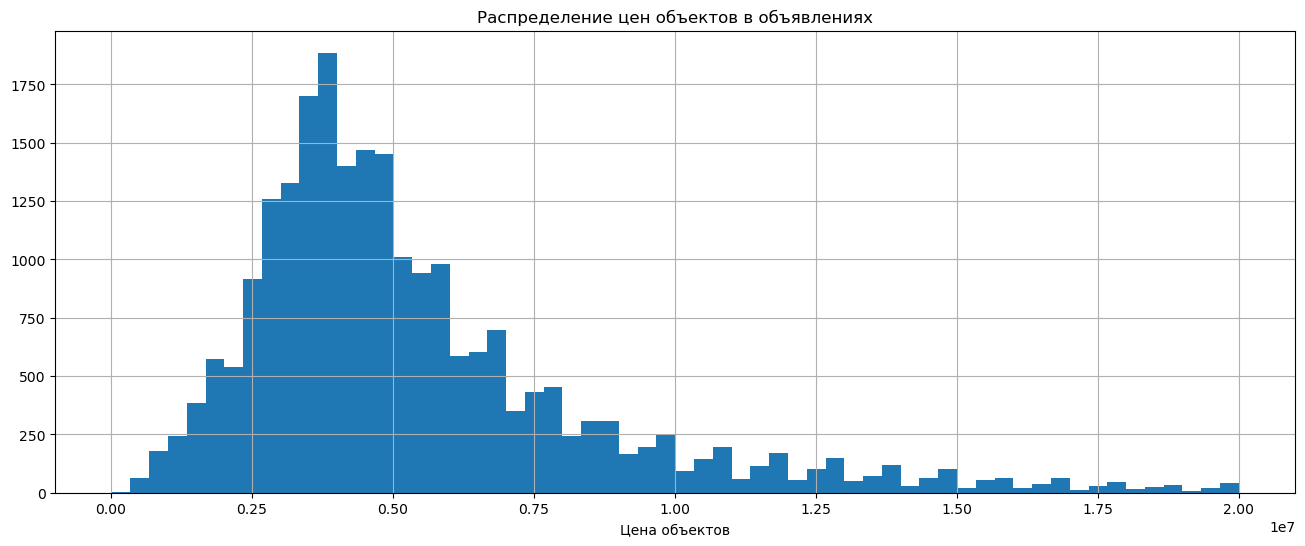

In [71]:
plt.figure(figsize=(16, 6))
data.last_price.hist(bins=60, range=(1.219000e+04,2.000000e+07))
plt.xlabel('Цена объектов')
plt.title('Распределение цен объектов в объявлениях')
plt.show()

**Большая часть объектов в диапозоне от 2,5 млн. до 5,5 млн.**

Избавимся от значений до 500 тыс. и больше 100 млн.

In [72]:
data_good_last_price = data.query('5.000000e+05>last_price<1.000000e+08').copy()

In [73]:
#проверим оставшееся количество строк
data_good_last_price['last_price'].count()

14

In [74]:
data_good_last_price[data_good_last_price['last_price']>1.000000e+08]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month_exposition,year_exposition,floors_group,city_center_km


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
В целом, тут мало значений и легко можем устранить лишнее 

In [75]:
data_good_last_price['last_price'].describe()

count        14.000000
mean     427299.285714
std      121104.875749
min       12190.000000
25%      442500.000000
50%      450000.000000
75%      470000.000000
max      490000.000000
Name: last_price, dtype: float64

**Рассмотрим данные о количестве комнат, столбец `rooms`**

In [76]:
data['rooms'].describe()

count    23613.000000
mean         2.071147
std          1.078380
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Построим гистограмму на сонове данных столбца `rooms`

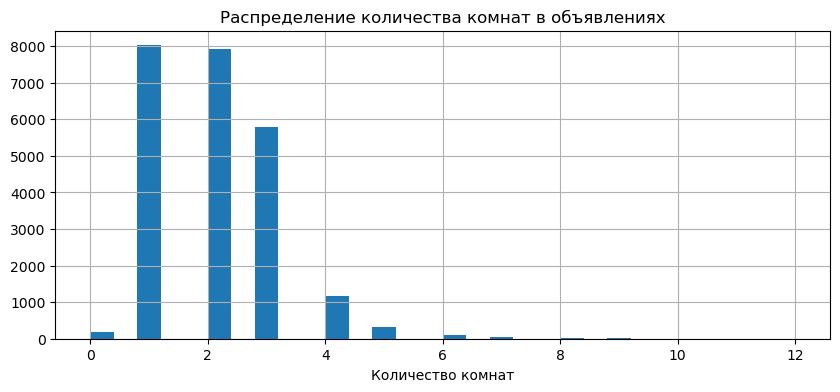

In [77]:
plt.figure(figsize=(10, 4))
data.rooms.hist(bins=30, range=(0,12))
plt.xlabel('Количество комнат')
plt.title('Распределение количества комнат в объявлениях')
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Распределение по комнатам логически соотносится с распределением по общей площади

**Самыми популярными являются объекты с одной, двумя и тремя комнатами.**

Затем по полулярности следуют четырехкомнатные объекты. Объекты с более шестью комнатами встрчеаются крайне редко.

Избавимся от нулевых значений и значений более шести.

In [78]:
data_good_rooms = data.query('0<rooms<=6').copy()

In [79]:
data_good_rooms['rooms'].describe()

count    23329.000000
mean         2.065369
std          0.993103
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

**Проанализируем данные столбца `ceiling_height`**

In [80]:
data['ceiling_height'].describe()

count    23613.000000
mean         2.698849
std          0.253641
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

Построим гистограмму на сонове данных столбца `ceiling_height`

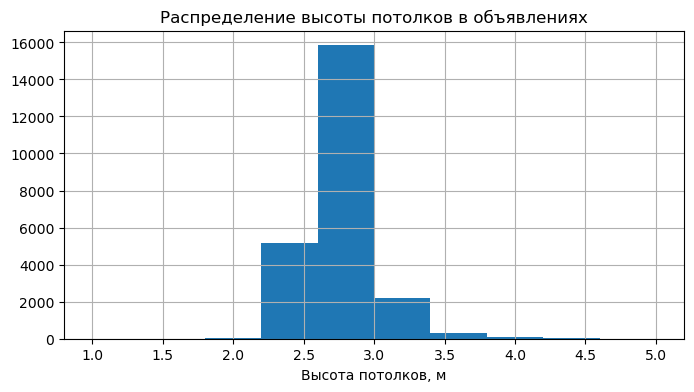

In [81]:
plt.figure(figsize=(8, 4))
data.ceiling_height.hist(bins=10, range=(1,5))
plt.xlabel('Высота потолков, м')
plt.title('Распределение высоты потолков в объявлениях')
plt.show()

**На графике наглядно видно, что больше всего объектов с высотой потолков от 2,5 до 3 м.**

Есть выбросы значений. Устраним эти значения.
Примем нижнюю границу в 2,5 м ,а верхнюю в 4 м. Эти числа кажутся разумными.

In [82]:
data_good_ceiling_height = data.query('2.5<=ceiling_height<=4').copy()

In [83]:
data_good_ceiling_height['ceiling_height'].unique()

array([2.7 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 3.5 ,
       3.3 , 2.71, 4.  , 2.73, 2.84, 3.1 , 3.4 , 3.06, 2.72, 2.54, 2.51,
       2.78, 2.76, 2.58, 3.7 , 2.52, 2.87, 2.66, 2.59, 3.6 , 2.92, 3.11,
       3.13, 3.8 , 3.15, 3.55, 3.16, 3.62, 3.12, 2.53, 2.74, 2.96, 2.79,
       2.95, 2.94, 3.82, 3.54, 3.53, 2.83, 3.38, 3.01, 3.65, 3.9 , 3.18,
       3.35, 3.57, 2.62, 2.82, 3.98, 2.63, 3.83, 3.52, 3.95, 3.75, 2.88,
       3.67, 3.87, 3.66, 3.85, 3.86, 3.24, 3.36, 3.08, 3.68, 3.07, 3.37,
       3.09, 3.26, 3.34, 2.81, 3.44, 2.97, 3.14, 2.68, 3.22, 3.27, 2.93,
       3.46, 3.47, 3.33, 3.63, 3.32, 2.98, 2.86, 3.17, 3.28, 3.04, 3.84,
       3.23, 3.02, 3.21, 3.43, 3.78, 3.39, 2.69, 3.31, 3.56, 3.51, 3.93,
       3.42, 2.99, 3.49, 2.91, 3.88, 3.29, 3.76, 3.69, 2.89, 3.58, 3.48,
       3.59])

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Здесь отлично избавились от лишнего. 

**Проанализируем данные столбца `floor`**

In [84]:
data['floor'].describe()

count    23613.000000
mean         5.877313
std          4.873539
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Построим гистограмму на оcнове данных столбца `floor`

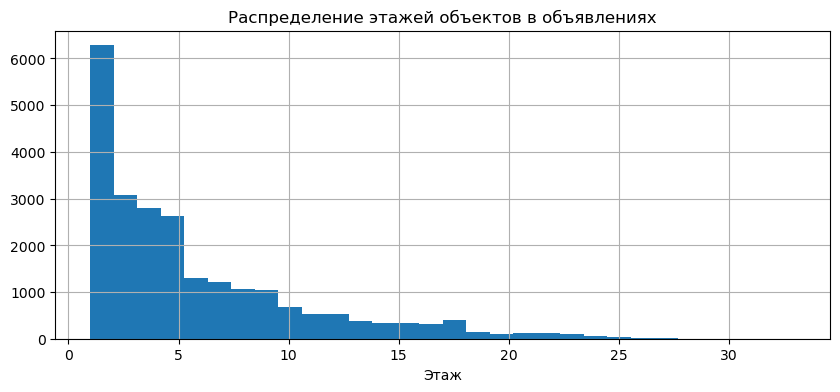

In [85]:
plt.figure(figsize=(10, 4))
data.floor.hist(bins=30, range=(1,33))
plt.xlabel('Этаж')
plt.title('Распределение этажей объектов в объявлениях')
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
По распределению видно, что у нас много домов типовой застройки

**Из гистограммы видно, что самые популярные этажи у объектов с первого по пятый.**

Затем с пятого по девятый. Объявления объектов, находящихся на 20-м и выше этажах встречаются редко.

**Проанализируем данные столбца `floors_group`**

In [86]:
data['floors_group'].value_counts()

floors_group
другой       17363
последний     3336
первый        2914
Name: count, dtype: int64

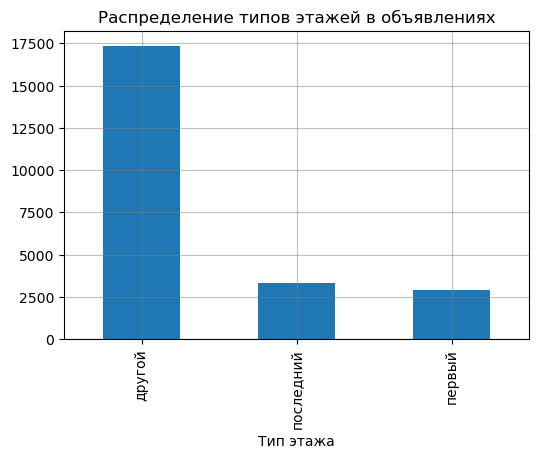

In [87]:
data['floors_group'].value_counts().plot.bar(figsize=(6, 4))
plt.title('Распределение типов этажей в объявлениях')
plt.xlabel('Тип этажа')
plt.grid(color='grey', axis='both', alpha=0.5)
plt.show()

**График показывает, что основная часть объявлений с типом этажа - другой.**

**Проанализируем данные в столбце с общим количеством этажей в доме `floors_total`**

In [88]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Построим график распределения количества этажей дома в объявлениях

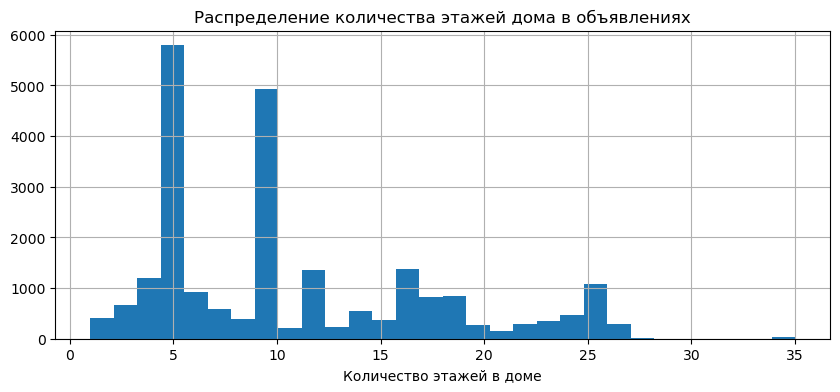

In [89]:
plt.figure(figsize=(10, 4))
data.floors_total.hist(bins=30, range=(1,35))
plt.xlabel('Количество этажей в доме')
plt.title('Распределение количества этажей дома в объявлениях')
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Да, все же типичных строений у нас много

**На графике видно, что самые популярные объявления - это объекты в пятиэтажных и девятиэтажных домах. Наверняка этот тренд можно наблюдать по всей России.**

**Проанализируем данные о расстоянии до центра города в метрах столбца `city_centers_nearest`** 

In [90]:
data['city_centers_nearest'].describe()

count    18104.000000
mean     14185.084015
std       8614.132292
min        181.000000
25%       9233.750000
50%      13093.000000
75%      16287.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Построим график распределение расстояния до центра города в объявлениях

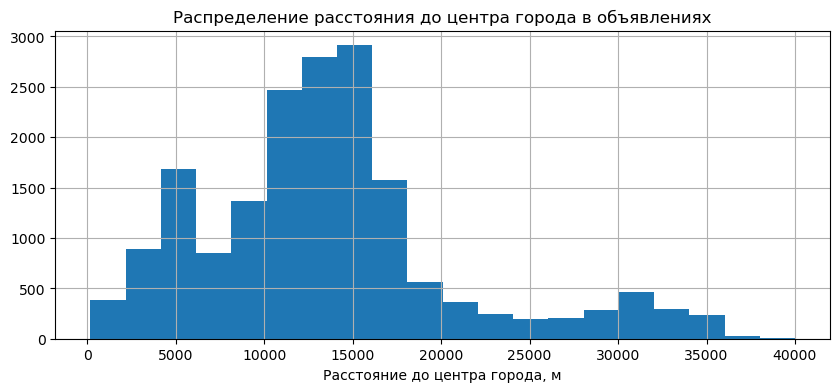

In [91]:
plt.figure(figsize=(10, 4))
data.city_centers_nearest.hist(bins=20, range=(180,40000))
plt.xlabel('Расстояние до центра города, м')
plt.title('Распределение расстояния до центра города в объявлениях')
plt.show()

**Гистограмма показывает, что самое большое количество объявлений с расстоянием до центра города примерно от 11000 до 17000 м.**

**Проанализируем данные о расстоянии до ближайшего аэропорта в столбце `airports_nearest`**

In [92]:
data['airports_nearest'].describe()

count    18081.000000
mean     28788.008185
std      12626.209956
min          0.000000
25%      18575.000000
50%      26726.000000
75%      37242.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Построим график распределения расстояния до ближайшего аэропорта

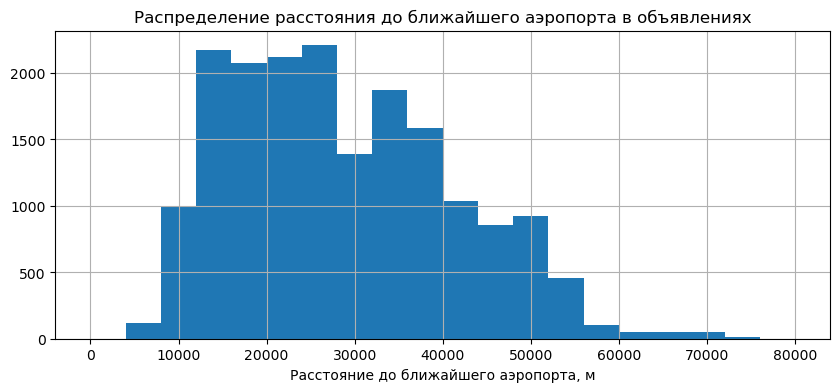

In [93]:
plt.figure(figsize=(10, 4))
data.airports_nearest.hist(bins=20, range=(0,80000))
plt.xlabel('Расстояние до ближайшего аэропорта, м')
plt.title('Распределение расстояния до ближайшего аэропорта в объявлениях')
plt.show()

**Гистограмма показывает, что основное количество объектов удалено от ближайшего аэропорта на расстоянии 11-27 км.** 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Выводы верные делаешь по графику

**Проанализируем данные о расстоянии до ближайшего парка в столбце `parks_nearest`**

In [94]:
data['parks_nearest'].describe()

count    8045.000000
mean      490.554630
std       341.336698
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Построим график распределения расстояния до ближайшего парка 

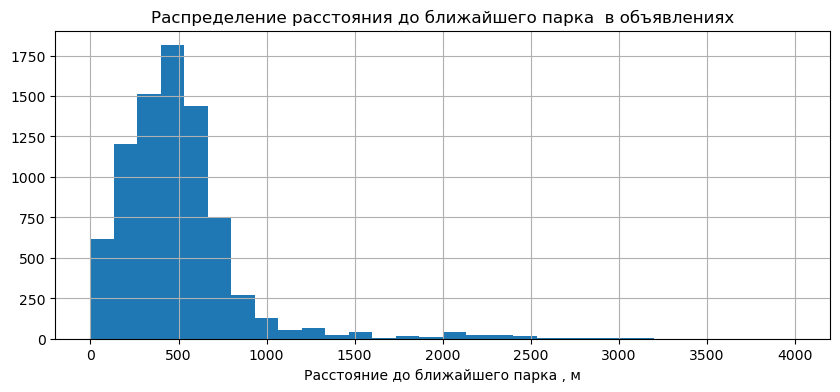

In [95]:
plt.figure(figsize=(10, 4))
data.parks_nearest.hist(bins=30, range=(0,4000))
plt.xlabel('Расстояние до ближайшего парка , м')
plt.title('Распределение расстояния до ближайшего парка  в объявлениях')
plt.show()

**График показывает, что большинство объектов расположены на расстоянии от 200 до 600 м.**

Значения с нулевым расстоянием, возможно, говорят о том, что возле дома нет парка или объект находится не в городе, где нет парков.
Длинный хвост после 1500 м можно считать редкими и аномальными значениями.

**Проанализируем данные о дне публикации объявлений `weekday_exposition`**

In [96]:
data['weekday_exposition'].value_counts()

weekday_exposition
3    4285
1    4170
4    3988
2    3956
0    3602
5    1922
6    1690
Name: count, dtype: int64

Построим график распределения дней недели публикации объявлений

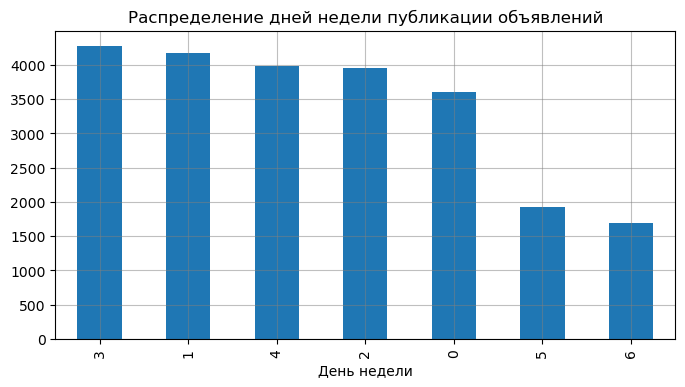

In [97]:
data['weekday_exposition'].value_counts().plot.bar(figsize=(8, 4))
plt.title('Распределение дней недели публикации объявлений')
plt.xlabel('День недели')
plt.grid(color='grey', axis='both', alpha=0.5)
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
В выходные дни люди меньше всего публикуют объявлений. Это логично 

**Из графика видим, что чаще всего объявления публикуют с ПН по ПТ, в выходные реже.**

**Проанализируем данные о месяце публикации объявлений `month_exposition`**

In [98]:
data['month_exposition'].value_counts()

month_exposition
2     2637
3     2580
11    2364
4     2362
10    2111
9     1974
6     1752
8     1741
7     1690
12    1641
1     1496
5     1265
Name: count, dtype: int64

Построим график распределения месяцев публикации объявлений

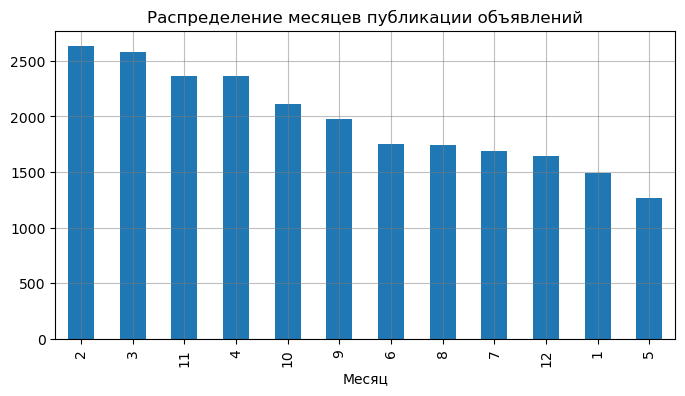

In [99]:
data['month_exposition'].value_counts().plot.bar(figsize=(8, 4))
plt.title('Распределение месяцев публикации объявлений')
plt.xlabel('Месяц')
plt.grid(color='grey', axis='both', alpha=0.5)
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Праздники влияют на распредеоление и тут 

**Отметим, что с февраля по апрель и с сентября по ноябрь объявления публикуются чаще.**

В летние месяцы и месяцы, в которых много выходных/праздничных дней, объявлений меньше.

**Изучим, как быстро продавались квартиры (столбец `days_exposition`).**

In [100]:
data['days_exposition'].describe()

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее значение почти в два раза больше медианы.

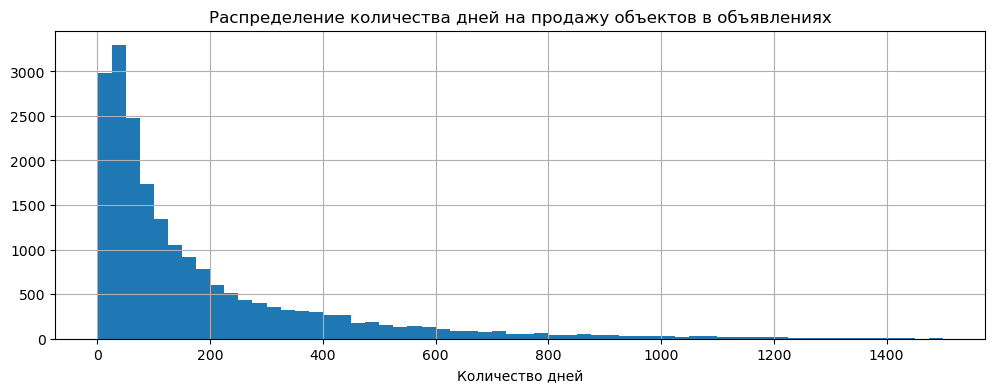

In [101]:
plt.figure(figsize=(12, 4))
data.days_exposition.hist(bins=60, range=(0,1500))
plt.xlabel('Количество дней')
plt.title('Распределение количества дней на продажу объектов в объявлениях')
plt.show()

**Наблюдаем длинный хвост и высокий показатель с нулевым количеством дней публикации объявлений, которыe влияют на среднее значение. Очень долгие продажи - больше 600 дней и очень быстрые продажи, когда объект продавали за 0-1 день.**

Посмотрим на график без этих значений с помощью метода .query().

In [102]:
data_good_days_exposition = data.query('7<days_exposition<600').copy()

Уменьшим масштаб диаграммы и возьмем диапозон от 1 до 300 дней и увеличим количество корзин.

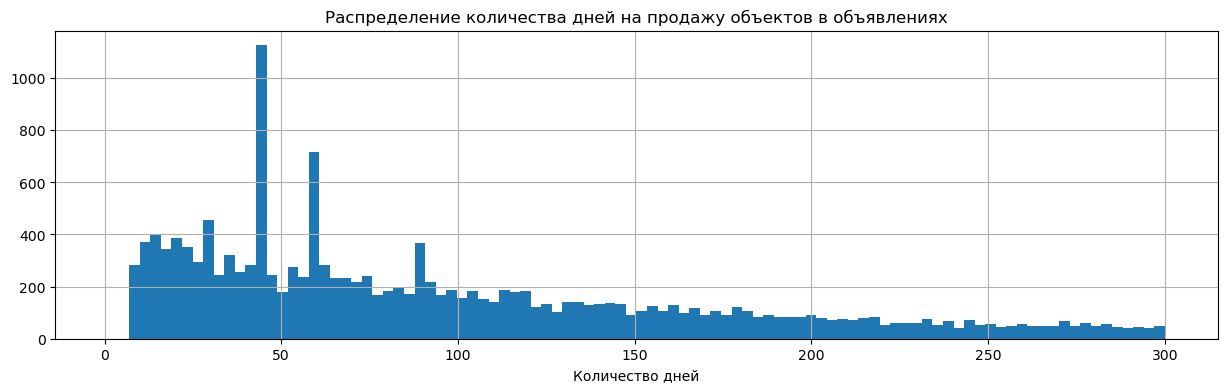

In [103]:
plt.figure(figsize=(15, 4))
data_good_days_exposition.days_exposition.hist(bins=100, range=(1,300))
plt.xlabel('Количество дней')
plt.title('Распределение количества дней на продажу объектов в объявлениях')
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Спасибо за такой подробный график. На нем видно выбросы. В эти дни система убирает с показа бесплатные объявления. 

**Заметим,что основная часть объектов продается в срок от 9 до 90 дней. Но в графике наблюдаются аномальные всплески.**

С помощью метода value_counts() посмотрим, каких значений больше всего.

In [104]:
data['days_exposition'].value_counts().head(10)

days_exposition
45.0    880
60.0    538
7.0     234
30.0    208
90.0    201
4.0     176
3.0     157
5.0     152
14.0    147
9.0     143
Name: count, dtype: int64

**Всплески в 45, 60, 30 и 90 дней. Возможно, через это количество дней необходимо обновить или удалить объявление.**

**Изучим, зависит ли цена объекта от:**

* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).

Построим графики, которые покажут зависимость цены от указанных выше параметров.

**Построим матрицу коррелиции зависимости цены `last_price` от параметров перечисленных выше.**

In [105]:
data_corr_matrix = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'weekday_exposition', 'month_exposition', 'year_exposition']].corr()['last_price']

In [106]:
data_corr_matrix

last_price            1.000000
total_area            0.653581
living_area           0.566396
kitchen_area          0.520018
rooms                 0.363124
weekday_exposition    0.001295
month_exposition      0.002765
year_exposition      -0.043023
Name: last_price, dtype: float64

**Зависимость стоимости объекта от общей площади. Построим диаграмму рассеивания.**

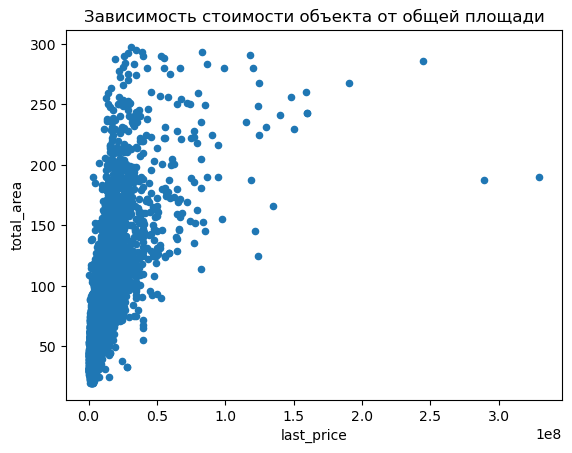

In [107]:
data_good_total_area.plot(x='last_price', y='total_area', kind='scatter')
plt.title('Зависимость стоимости объекта от общей площади')
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Подобран отличный метод показа зависимости на графике. 

**Из диаграммы рассеивания видна прямая зависимость стоимости объекта от общей площади. Что вполне прогнозируемо: чем больше площадь объекта, тем больше стоимость.**

In [108]:
#посчитаем коэффцициент корреляции
data_good_total_area['total_area'].corr(data_good_total_area['last_price']).round(2)

0.67

**Коэфициент Пирсона 0,67 подтверждает достаточно высокую линейную зависимость между общей площадью объекта и его стоимостью.**

**Зависимость стоимости объекта от жилой площади. Построим диаграмму рассеивания.**

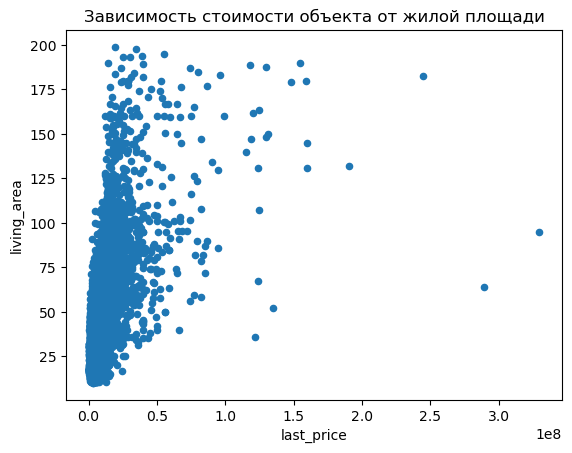

In [109]:
data_good_living_area.plot(x='last_price', y='living_area', kind='scatter')
plt.title('Зависимость стоимости объекта от жилой площади')
plt.show()

**Диаграмма подтверждает, что чем больше жилая площадь, тем больше стоимость объекта.**

In [110]:
#посчитаем коэффцициент корреляции
data_good_living_area['living_area'].corr(data_good_living_area['last_price']).round(2)

0.59

**Коэфициент Пирсона 0,58 подтверждает наличие положительной линейной зависимости между общей площадью объекта и его стоимостью.**

**Зависимость стоимости объекта от площади кухни. Построим диаграмму рассеивания.**

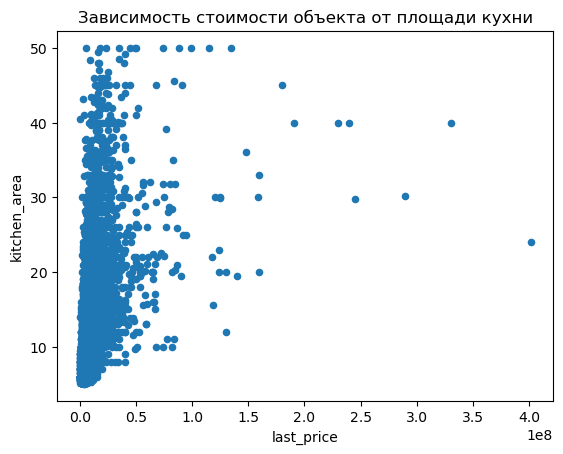

In [111]:
data_good_kitchen_area.plot(x='last_price', y='kitchen_area', kind='scatter')
plt.title('Зависимость стоимости объекта от площади кухни')
plt.show()

**На графике наблюдается не ярко выраженная зависимость стоимости объекта от площади кухни.**

In [112]:
#посчитаем коэффцициент корреляции
data_good_kitchen_area['kitchen_area'].corr(data_good_kitchen_area['last_price']).round(2)

0.48

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Небольшую зависимость мы наблюдаем

**Коэфициент Пирсона 0,48 подтверждает наличие положительной линейной зависимости между площадью кухни объекта и его стоимостью.**

**Зависимость стоимости объекта от количества комнат. Построим график.**

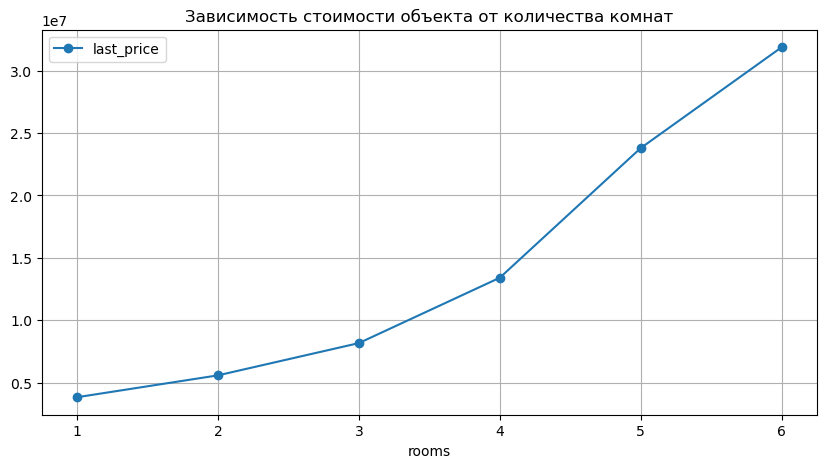

In [113]:
data_good_rooms.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(10, 5))
plt.title('Зависимость стоимости объекта от количества комнат')
plt.show()

**Наблюдается ярковыраженная зависимость: чем больше комнат, тем выше стоимость объекта.**

In [114]:
#посчитаем коэффцициент корреляции
data_good_rooms['kitchen_area'].corr(data_good_rooms['last_price']).round(2)

0.5

**Коэфициент Пирсона 0,5 подтверждает наличие положительной линейной зависимости между количеством комнат объекта и его стоимостью.**

**Зависимость стоимости объекта от этажа расположения объекта. Построим график.**

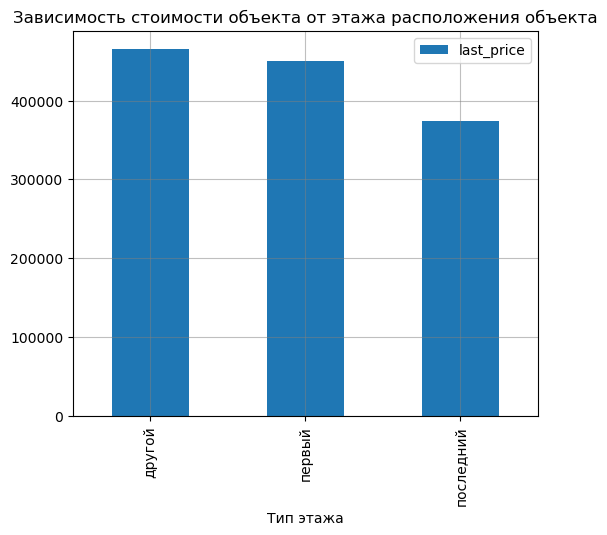

In [115]:
data_good_last_price.pivot_table(index='floors_group', values='last_price').plot(kind='bar', figsize=(6, 5))
plt.title('Зависимость стоимости объекта от этажа расположения объекта')
plt.xlabel('Тип этажа')
plt.grid(color='grey', axis='both', alpha=0.5)
plt.show()

**Самая высокая стоимость у объектов в группе "другой" этаж (не первый и не последний).**

У объектов на последних этажах стоимость ниже.

**Зависимость стоимости объекта от дня публикации объявления. Построим график.**

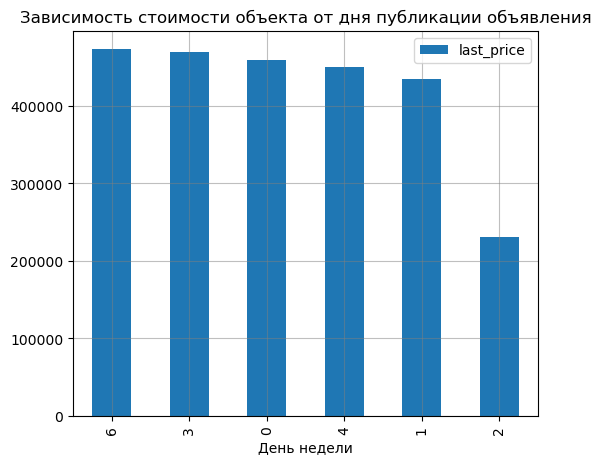

In [116]:
data_good_last_price.pivot_table(index='weekday_exposition', values='last_price').sort_values(by='last_price', ascending = False).plot(kind='bar', figsize=(6, 5))
plt.title('Зависимость стоимости объекта от дня публикации объявления')
plt.xlabel('День недели')
plt.grid(color='grey', axis='both', alpha=0.5)
plt.show()

**Судя по графику самая высокая стоимость у объектов размещенных в воскресенье.**


В целом стоимость объектов раземещнных во все дни недели, кроме среды, выше. Возможно, существует примета, что в среду лучше не продавать дорогую недвижимость)

In [117]:
#посчитаем коэффцициент корреляции
#data['weekday_exposition'].corr(data_good_last_price['last_price']).round(2)

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Для дня, месяца и года нет смысла расчитывать корреляцию. У этих показателей нет линейной связи и вывод о зависимости стоит сделать только по графику.

<div class="alert alert-block alert-info">
 
**Комментарий студента**

Принято. Не удаляю же код, только закомментирую, верно?

</div 
>

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Да, можно так и сделать

In [118]:
#Коэффициент Пирсона сообщает, что взаимосвязь между стоимостью объектов и днем недели размещения объявления слобовыраженная.

**Зависимость стоимости объекта от месяца публикации объявления. Построим график.**

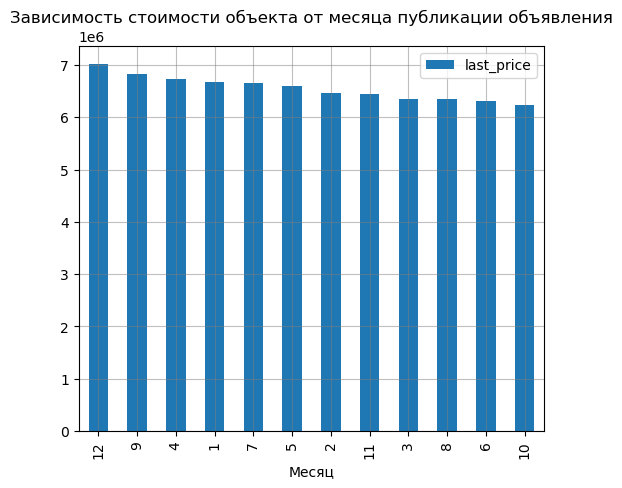

In [119]:
data.pivot_table(index='month_exposition', values='last_price').sort_values(by='last_price', ascending = False).plot(kind='bar', figsize=(6, 5))
plt.title('Зависимость стоимости объекта от месяца публикации объявления')
plt.xlabel('Месяц')
plt.grid(color='grey', axis='both', alpha=0.5)
plt.show()

**На графике видно, что в декабре незначительный рост стоимости объектов, чем в другие месяцы.**

In [120]:
#посчитаем коэффцициент корреляции
#data['month_exposition'].corr(data_good_last_price['last_price']).round(2)

In [121]:
#Коэффициент коррелиции выше, чем у дней недели. Возможно, в декабре собственники смелее расстаются с недвижимостью.

**Зависимость стоимости объекта от года публикации объявления. Построим график.**

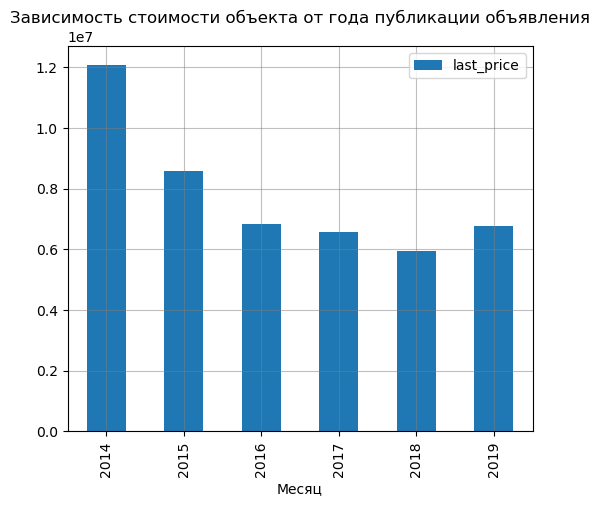

In [122]:
data.pivot_table(index='year_exposition', values='last_price').plot(kind='bar', figsize=(6, 5))
plt.title('Зависимость стоимости объекта от года публикации объявления')
plt.xlabel('Месяц')
plt.grid(color='grey', axis='both', alpha=0.5)
plt.show()

**В 2014 году стоимость объектов гораздо выше других лет.**

В последующие годы стоимость снижалась и рост появился только в 2019 году. Это может быть связано с экономической ситуацией на рынке недвижимости в эти годы.

In [123]:
#посчитаем коэффцициент корреляции
#data['year_exposition'].corr(data_good_last_price['last_price']).round(2)

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Тут все хорошо, но рассчет корреляции стоит подправить 

In [124]:
#Коэффициент Пирсона подтверждает обратную линейную связь: чем больше год, тем ниже стоимость объекта.

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

In [125]:
#создадим переменную с топ-10 населенных пунктов с самым большим количеством объявлений
locality_spb = data['locality_name'].value_counts().head(10)

In [126]:
#сформируем сводную таблицу со стоимостью квадратного метра по каждому населенному пункту из locality_spb
locality_pivot = data.query('locality_name in @locality_spb.index').pivot_table(index='locality_name', values='price_square_meter',aggfunc=['count', 'mean'])

In [127]:
#Переименуем столбцы
locality_pivot.columns = ['count', 'price_square_meter']

In [128]:
locality_pivot

,count,price_square_meter
locality_name,,
Всеволожск,398,68654.473970
Выборг,237,58141.909325
Гатчина,307,68746.146515
Колпино,338,75424.579112
Кудрово,470,95260.846128
Мурино,586,86041.116024
Парголово,327,90175.913089
Пушкин,369,103125.819377
Санкт-Петербург,15651,114868.877339


In [129]:
#отсортируем данные в порядке убывания по столбцу `count`
locality_pivot.sort_values(by='count', ascending = False).head(10)

,count,price_square_meter
locality_name,,
Санкт-Петербург,15651,114868.877339
Мурино,586,86041.116024
Кудрово,470,95260.846128
Шушары,439,78551.344647
Всеволожск,398,68654.473970
Пушкин,369,103125.819377
Колпино,338,75424.579112
Парголово,327,90175.913089
Гатчина,307,68746.146515


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Рейтинг топ-10 по городам получен

**Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

In [130]:
#населённый пункт с самой высокой стоимостью квадратного метра.
locality_pivot[locality_pivot['price_square_meter']==locality_pivot['price_square_meter'].max()]

,count,price_square_meter
locality_name,,
Санкт-Петербург,15651,114868.877339


In [131]:
#населённый пункт с самой низкой стоимостью квадратного метра.
locality_pivot[locality_pivot['price_square_meter']==locality_pivot['price_square_meter'].min()]

,count,price_square_meter
locality_name,,
Выборг,237,58141.909325


**Среди десяти самых популярных населенных пунктов самая высокая стоимость квадратного метра в Санкт-Петербурге, а самая низкая в Выборге.**

**Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра.**

In [132]:
#создадим переменную только со значением Санкт-Петербург
only_spb = data.query('locality_name == "Санкт-Петербург"')

In [133]:
#проверим результат
only_spb.head(5).T

,0,2,3,4,7
total_images,20,10,0,2,5
last_price,13000000.0,5196000.0,64900000.0,10000000.0,7915000.0
total_area,108.0,56.0,159.0,100.0,71.6
first_day_exposition,2019-03-07 00:00:00,2015-08-20 00:00:00,2015-07-24 00:00:00,2018-06-19 00:00:00,2019-04-18 00:00:00
rooms,3,2,3,2,2
ceiling_height,2.7,2.65,2.65,3.03,2.65
floors_total,16.0,5.0,14.0,14.0,24.0
living_area,51.0,34.3,NaN,32.0,NaN
floor,8,4,9,13,22
is_apartment,True,True,True,True,True


In [134]:
#сформируем сводную таблицу удаленности объекта от центра и стоимости квадратного метра
city_center_pivot = only_spb.pivot_table(index='city_center_km',values='price_square_meter',aggfunc='mean')

In [135]:
city_center_pivot.head(10)

,price_square_meter
city_center_km,
0.0,245833.530370
1.0,177005.407604
2.0,157849.007290
3.0,121507.831638
4.0,133282.874738
5.0,140453.957005
6.0,151012.193673
7.0,156176.879524
8.0,125649.733148


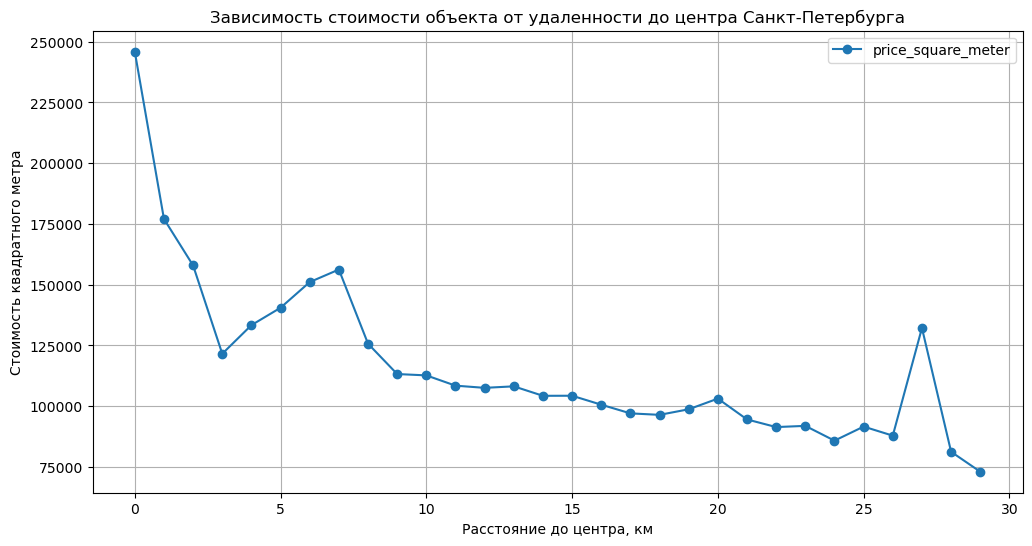

In [136]:
#построим график зависимости этих параметров
city_center_pivot.plot(grid=True, style='o-', figsize=(12, 6))
plt.title('Зависимость стоимости объекта от удаленности до центра Санкт-Петербурга')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Стоимость квадратного метра')
plt.show()

**Из графика видно, что самая высокая стоимость квадратного метра в центре города.** 

Затем в зависимости от удаленности стоимость квадратного метра снижается.

Есть спад стоимости в районе 3 км от центра, возможно, это связанно с особенностями жилого фонда в этом радиусе: наличие коммунальных квартир или устаревшего жилого фонда.

Так же есть пик в районе 26-27 км от центра города. Возможно, там находится поселок бизнесс-класса или несколько элитных объектов, которые повлияли на среднюю стоимость.

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
А как считаешь, где заканчивается зона центра города? 

<div class="alert alert-block alert-info">
 
**Комментарий студента**

Хороший вопрос) Петербуржцы на "границе" центра, наверное, поспорили бы)
Судя по одной из схем https://infotaksi.com/wp-content/uploads/2016/12/kak.jpg радиус центра 4 км, в целом города около 30 км.


</div 
>

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Тут скорее после 8 км. Там цена уже перестала резко падать и скорее говорит о том, что зона центра города закончилась 

**Выводы**

Выявили параметры, которые больше всего влияют на общую стоимость объекта:

- чем больше общая площадь объекта, тем выше его стоимость;
- чем больше жилая площадь объекта, тем выше его стоимость;
- чем больше количество комнат, тем выше его стоимость;
- объекты не на первом и не на последнем этажах, стоят дороже.

Построили графики, которые показали зависимость, посчитали коэффциент корреляции.

## Общий вывод

В ходе исследования проанализировали архив объявлений сервиса Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

**Выявили параметры, которые больше всего влияют на общую стоимость объекта:**


- чем больше общая площадь объекта, тем выше его стоимость;
- чем больше жилая площадь объекта, тем выше его стоимость;
- чем больше количество комнат, тем выше его стоимость;
- объекты не на первом и не на последнем этажах, стоят дороже.


**Сформировали портрет основной части объектов. Это:**


- объекты с общей площадью примерно от 30 до 100 кв. м.;
- самое большое количество объектов с жилой площадью от 15 до 50 кв. м.;
- наибольшее количество объявлений с площадью кухни от 5 до 18 кв. м.;
- большая часть объектов в диапозоне от 2,5 млн. до 5,5 млн.;
- самыми популярными являются объекты с одной, двумя и тремя комнатами;
- основная часть объявлений с типом этажа - другой (не первый и не последний), самые популярные этажи до пятого;
- больше всего объектов с высотой потолков от 2,5 до 3 м.
- самые популярные объявления - это объекты в пятиэтажных и девятиэтажных домах;
- самое большое количество объявлений с расстоянием до центра города от 11 до 17 км, до ближайшего аэропорта 11-27 км, до ближайшего парка 200-600 м;
- чаще всего объявления публикуют с ПН по ПТ, с февраля по апрель и с сентября по ноябрь;

  **Заметим, что основная часть объектов продается в срок от 9 до 90 дней. В 2014 году была наиболее высокая стоимость квадратного метра. Самая высокая стоимость квадратного метра в центре Санкт-Петербурга, там же наибольшее количество объявлений.**

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Спасибо тебе большое за такой развернутый вывод. Данных точно достаточно для того, чтобы составить антифрод-систему Сервиса Недвижимости. Я уверен, что приведенные инсайты в данных смогли ответить на все вопросы. 

<div class="alert alert-block alert-info">
 
### Итоговый Комментарий ревьюера
    
#### Успех
    
Благодарю тебя за выполнение работы. Мне понравился твой проект за структурность и последовательность. Во многих местах ты подбираешь оптимальный код и автоматизируешь свою работу, а это очень пригодится в будущем. Выделить бы хотел Предобработку данных. На мой взгляд она получилась особенно удачно. Очень насыщенный итоговый вывод вышел. Старайся такие выводы делать и в будущем. 
    
    
Однако, в проекте есть несколько замечаний, которые надо исправить:

* Посчитать количество оставшихся значений после устранения неявных дублей. 
* Убрать подсчет корреляции для некоторых параметров. 
       
Еще я оставил рекомендации. Очень надеюсь, что ты учтешь их в этом и последующих проектах.
       
Жду проект после доработки. Уверен, ты справишься.
</div>

<div class="alert alert-block alert-info">
 
**Комментарий студента**

Надеюсь оформление "инфо" комментария студента допустимо)
Вячеслав, еще раз спасибо тебе за высокую оценку проекта. Я правда не очень рассчитывала на это, но все бессоные ночи оказались не зря)

Замечания исправила, рекомендации учла.

Жду обратной связи.

</div 
>

<div class="alert alert-block alert-success">
 
# Итоговый Комментарий ревьюера ver.2 
    
#### Успех
    
Спасибо тебе большое за доработку проекта. Вот теперь я его готов принять. От себя я хочу пожелать успехов в дальнешей учебе. Ты точно справишься и дальше, я в этом уверен. 

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод